# 1.5 ANN

## Contents
### 1. Import libraries and Data
### 2. Create  Matrices
### 3. Standardize Data
#### ANN Test 1
#### ANN Test 2
#### ANN Test 3

## 1. Import Libraries and Data

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [107]:
#Create a path to where your data is stored.
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/11-2024 ClimateWins Analysis/02 Data'


In [108]:
df = pd.read_csv(os.path.join(path, 'unscaled_ML.csv'))

In [109]:
dfpls = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)
dfpls

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Create Matrices

In [111]:
# Create X matrix from df and y from dfpls
X = df.drop(['Unnamed: 0'], axis=1)
y = dfpls.drop(['DATE'], axis=1)

In [112]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [113]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


## 3. Standardize Data

In [116]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [117]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

## 4. ANN Test 1

In [119]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [120]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.43016500116198003
0.43116068316486583


In [121]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'Unnamed: 0',
 'VALENTIA']

In [122]:
locations.remove('Unnamed: 0')  # This will modify the list in place
print(locations)  # Verify that the item was removed

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [123]:
print(y_test.shape)
print(y_pred.shape)

(5738, 15)
(17212, 15)


In [124]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred_test shape: {y_pred_test.shape}")

y_test shape: (5738, 15)
y_pred_test shape: (5738, 15)


In [125]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

y_test shape: (5738, 15)
y_pred shape: (17212, 15)


In [126]:
print(y_test.columns)

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')


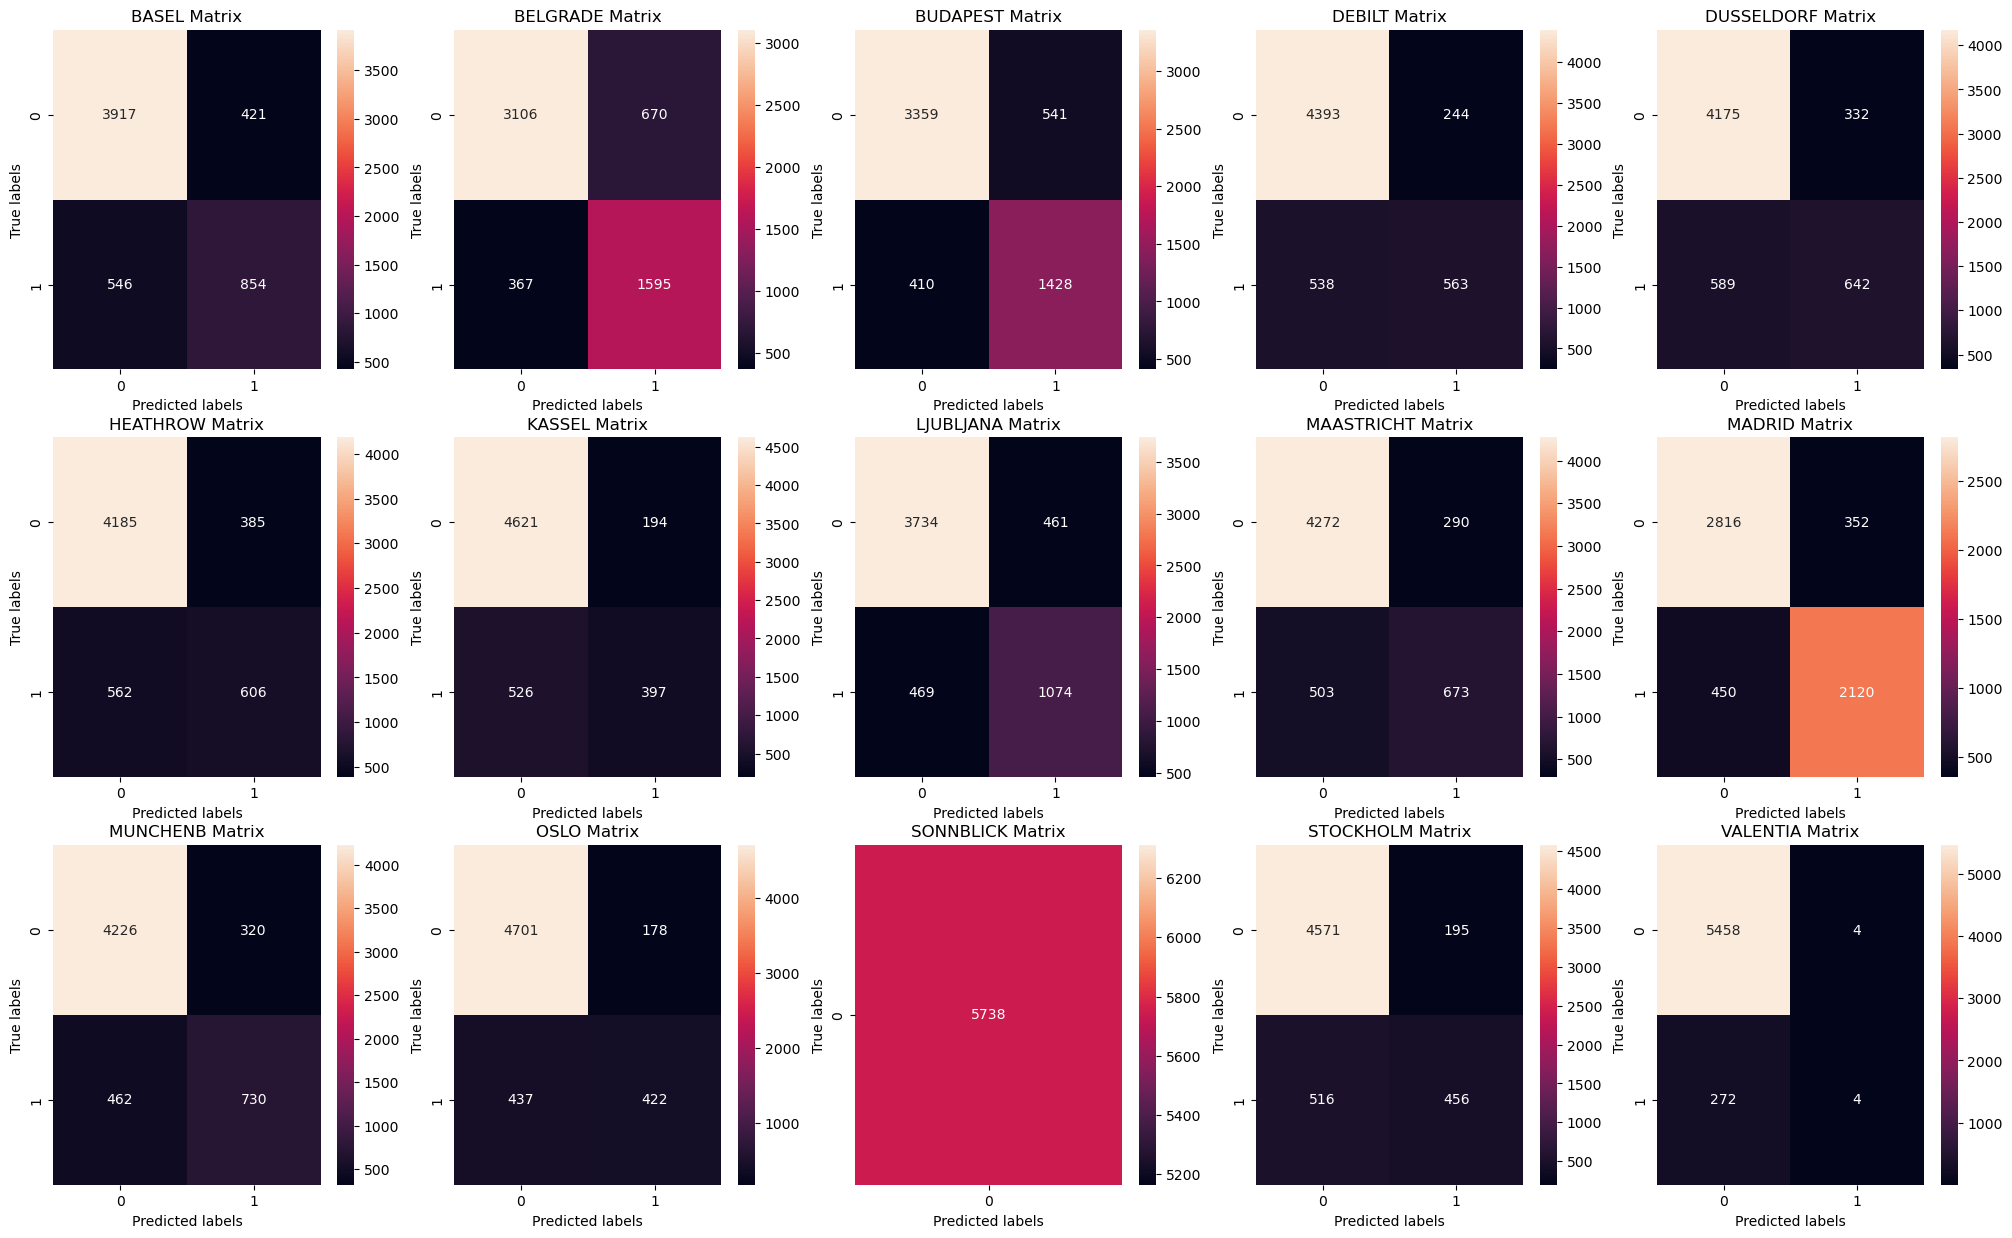

In [127]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [128]:
# If you're calculating precision, recall, and F1 scores, use y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1 = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7159928177821807
Recall: 0.6350008236779968
F1 Score: 0.6730690879459869


## ANN Test 2

In [130]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500)

In [131]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4581687194980246
0.4527710003485535


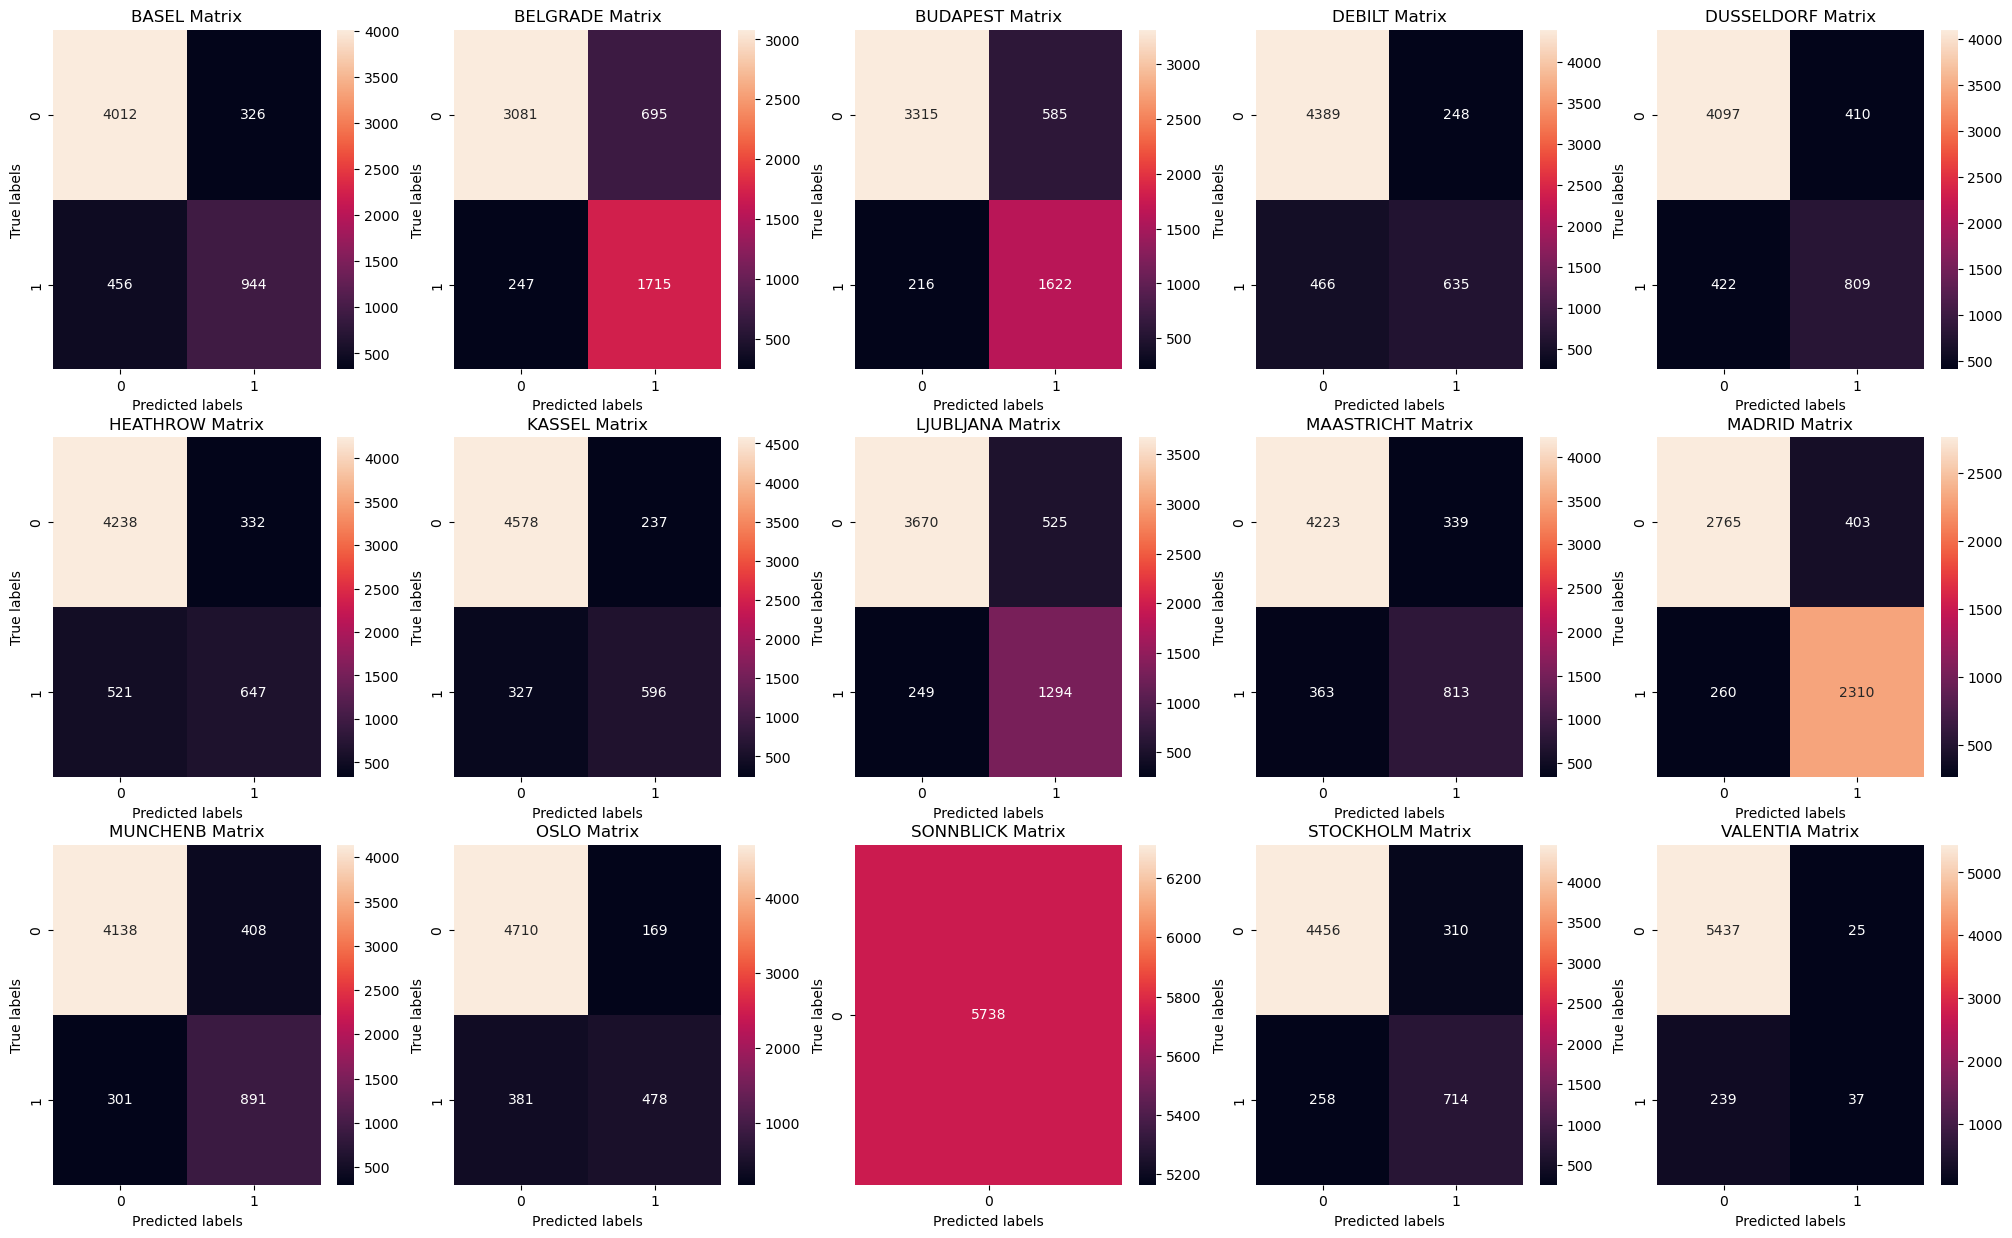

In [132]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [133]:
# Predict on training data (optional, for checking how well the model fits the training set)
y_pred_train = mlp.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on test data (this is the main evaluation)
y_pred_test = mlp.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# If you're calculating precision, recall, and F1 scores, use y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1 = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 0.4581687194980246
Test Accuracy: 0.4527710003485535
Precision: 0.7293298050440136
Recall: 0.7415847564658723
F1 Score: 0.7354062295796124


## ANN Test 3

In [135]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(20, 50, 25), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 50, 25), max_iter=1000)

In [136]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.454276086451313
0.4531195538515162


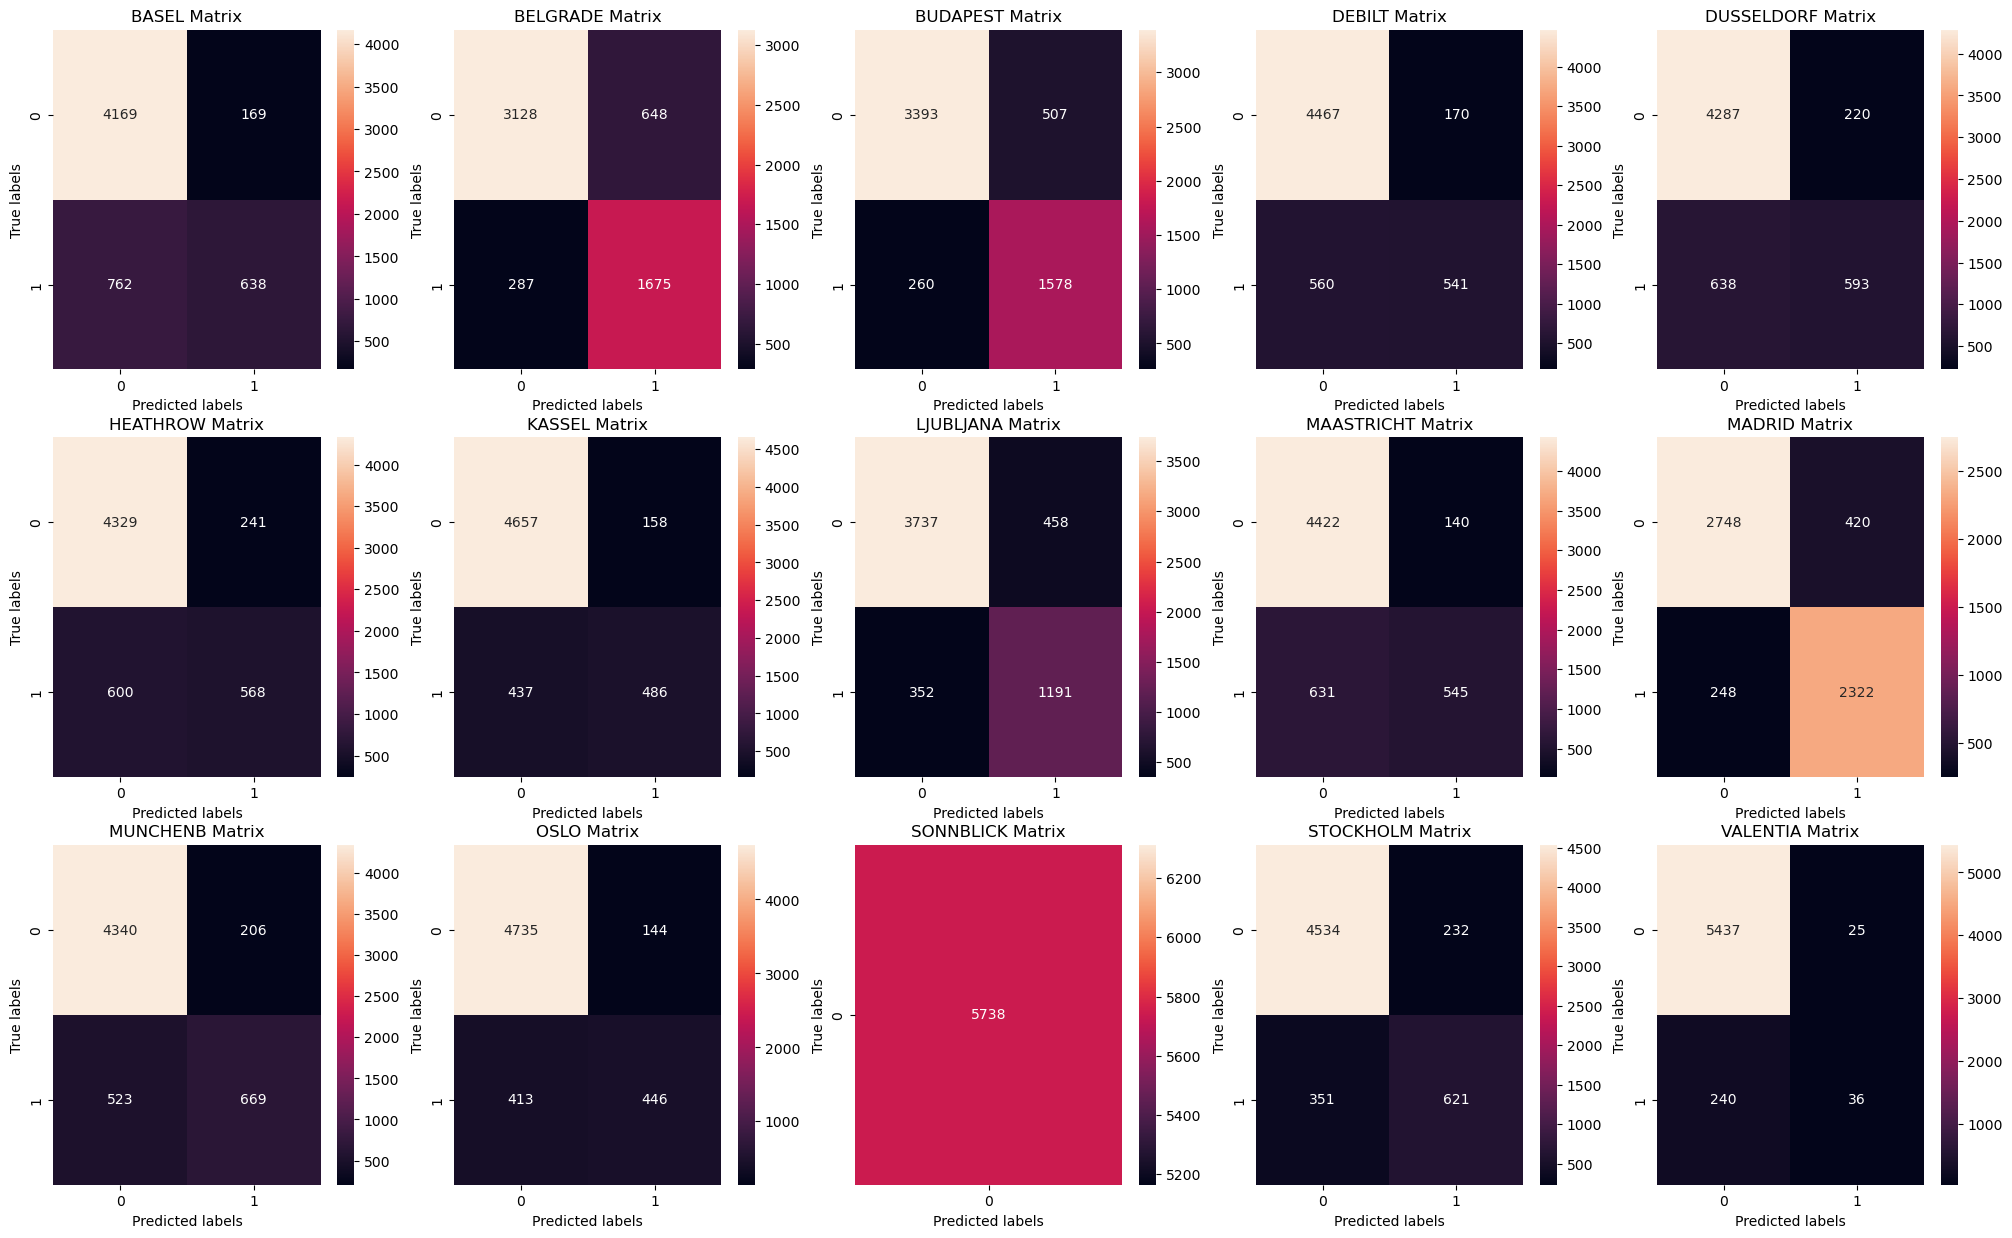

In [137]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [165]:
# Predict on training data (optional, for checking how well the model fits the training set)
y_pred_train = mlp.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on test data (this is the main evaluation)
y_pred_test = mlp.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# If you're calculating precision, recall, and F1 scores, use y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1 = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 0.454276086451313
Test Accuracy: 0.4531195538515162
Precision: 0.7611043650540039
Recall: 0.6539454176047443
F1 Score: 0.7034674227656683


## ANN Test 4

In [168]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, tol=0.01)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, tol=0.01)

In [169]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.47687659772251917
0.45329383060299755


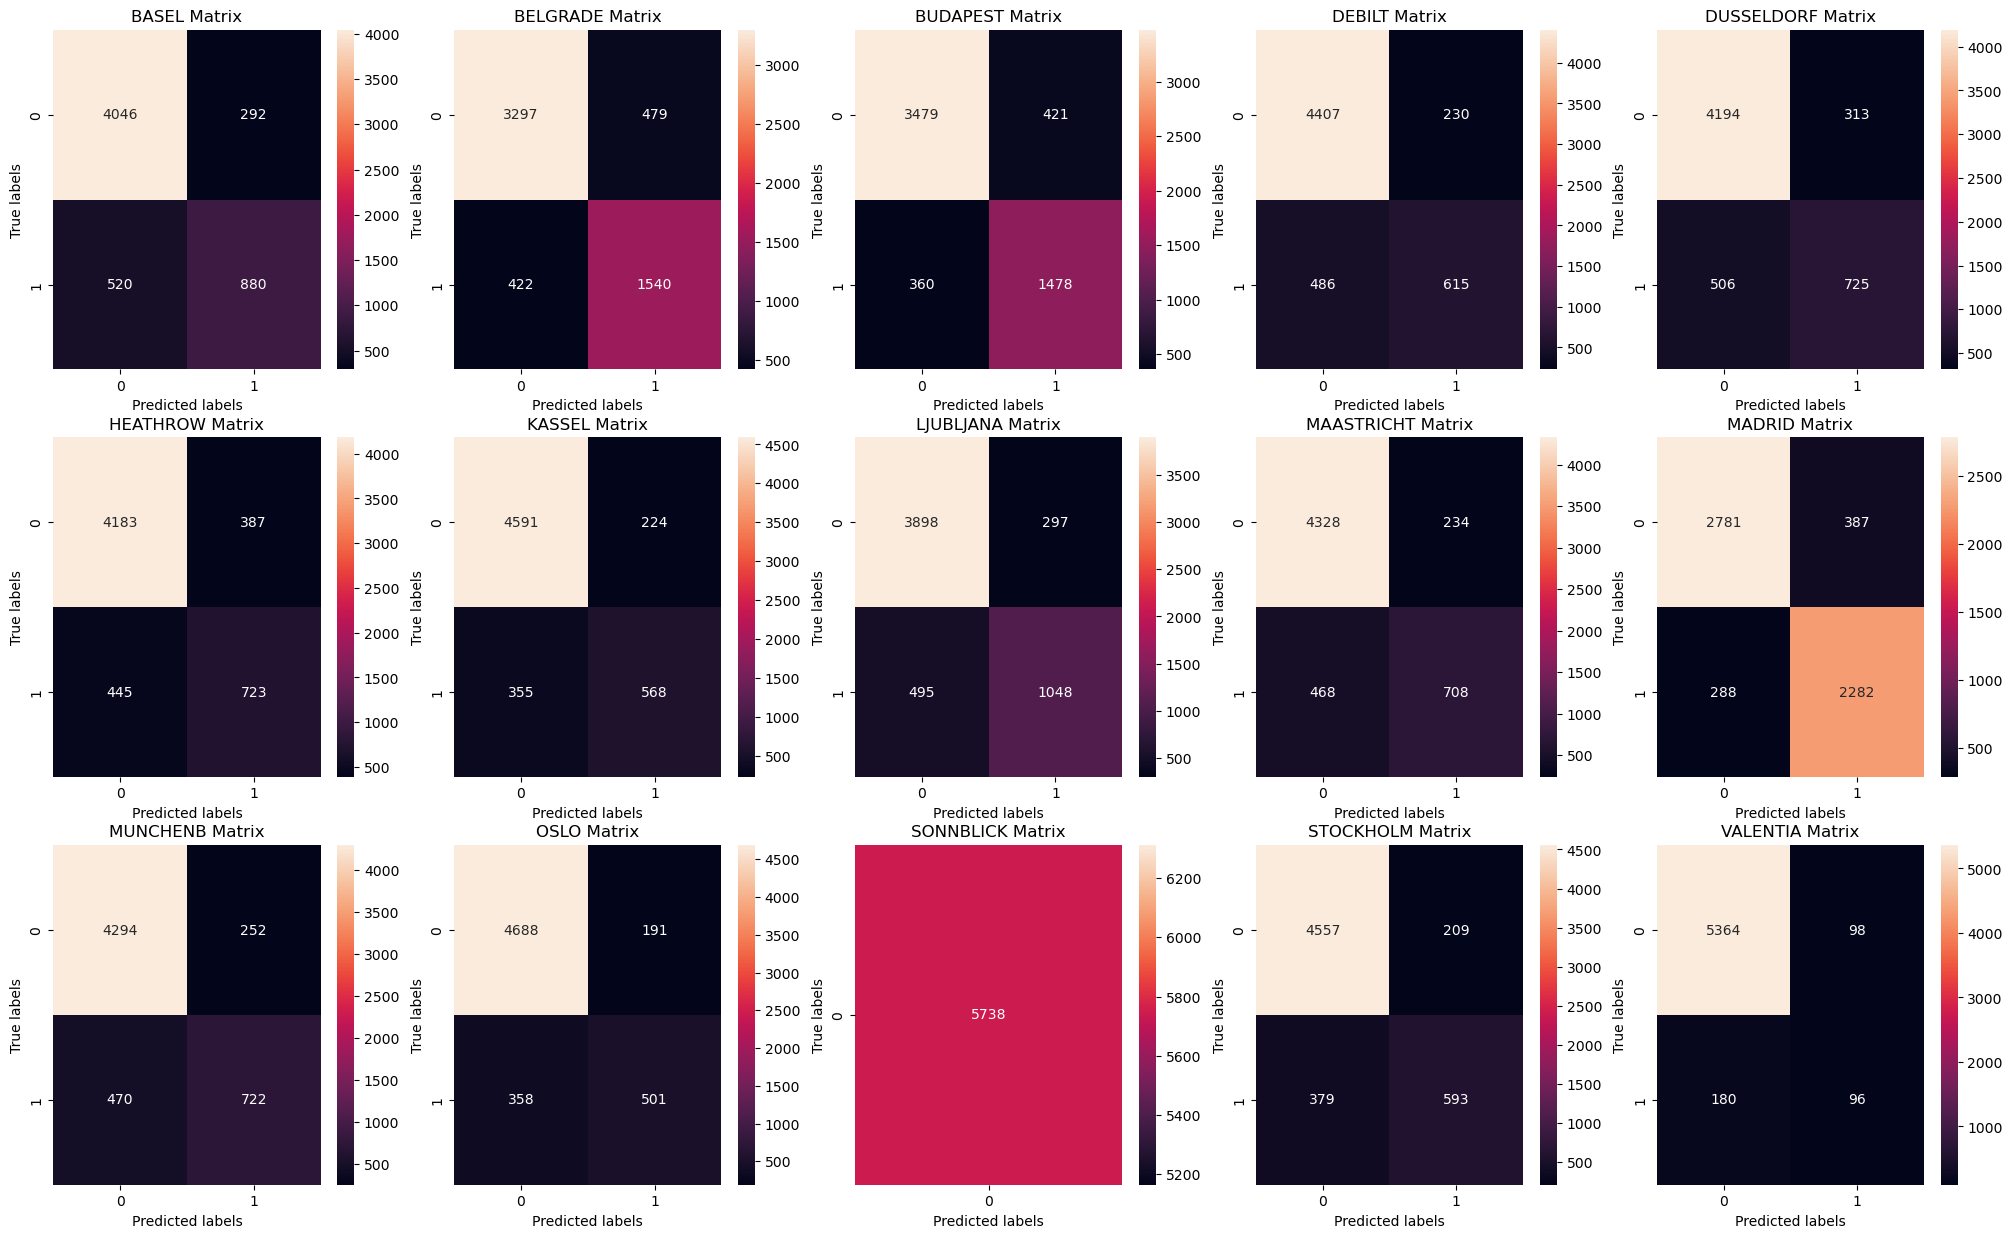

In [170]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [174]:
# Predict on training data (optional, for checking how well the model fits the training set)
y_pred_train = mlp.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on test data (this is the main evaluation)
y_pred_test = mlp.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# If you're calculating precision, recall, and F1 scores, use y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1 = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 0.47687659772251917
Test Accuracy: 0.45329383060299755
Precision: 0.7566240223124963
Recall: 0.6852451814837186
F1 Score: 0.7191678192715537
